## Sequence processing

Removal of special symbols, removal of sequences containing non-standard amino acids

In [22]:
import numpy as np
import os
dir_path = os.getcwd()

aa_list = ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
def clean_seq_set(seq_list):
    new_seq_list = set()
    other_char_list = set()
    for i, seq in enumerate(seq_list):   
        seq = seq.replace('\n', '').replace('<|endoftext|>', '')
        seq = seq.replace(' ', '').upper()
        flag = False
        if len(seq) == 0:
            continue
        for aa in seq:
            if aa not in aa_list:
                other_char_list.add(aa)
                flag = True
                break
        if flag:
            continue
        else:
            new_seq_list.add(seq)
    return list(new_seq_list)

# Allalpha
random_seq_list = np.load(dir_path + '/Allalpha/random_seq2000.npy')   # 3824
pretrain_seq_list = np.load(dir_path + '/Allalpha/pretrain_generate.npy')  # 3706
finetune_seq_list = np.load(dir_path + '/Allalpha/finetune_E100_LR5e-06_BS8_ML512_generate_mxlen500.npy')  # 3692
prefix_seq_list = np.load(dir_path + '/Allalpha/prefix_PREFIX_TUNING_CAUSAL_LM_E100_LR0.005_BS8_ML512_VT100_mxlen500.npy')

random_seq_list =  clean_seq_set(random_seq_list)
pretrain_seq_list = clean_seq_set(pretrain_seq_list)
finetune_seq_list = clean_seq_set(finetune_seq_list)
prefix_seq_list = clean_seq_set(prefix_seq_list)


# Visualization

In [23]:
import numpy as np
import os
dir_path = os.getcwd()

all_data_seq_dssp_hrate_dict = {}
all_data_seq_dssp_dict = np.load(dir_path + '/Allalpha//all_data_seq_dssp_dict.npy', allow_pickle=True).item()

for k in all_data_seq_dssp_dict.keys():
    all_data_seq_dssp_hrate_dict[k] = []

for t in all_data_seq_dssp_dict.keys():
    dssp_count_list = all_data_seq_dssp_dict[t]
    for dssp_count in dssp_count_list:
        beta_sum = 0
        if 'H' in dssp_count.keys():
            beta_sum += dssp_count['H'] 

        alpha_rate = beta_sum / sum(list(dssp_count.values()))
        all_data_seq_dssp_hrate_dict[t].append(alpha_rate)

In [24]:
import pandas as pd
import numpy as np
import random

for t in all_data_seq_dssp_hrate_dict.keys():
    hrate_list = all_data_seq_dssp_hrate_dict[t]
    all_data_seq_dssp_hrate_dict[t] = hrate_list 
for t in all_data_seq_dssp_hrate_dict.keys():
    print(t, len(all_data_seq_dssp_hrate_dict[t]), sum(all_data_seq_dssp_hrate_dict[t])/len(all_data_seq_dssp_hrate_dict[t]))
expanded_data = [(k, v) for k, lst in all_data_seq_dssp_hrate_dict.items() for v in lst]

all_data_seq_dssp_hrate_df = pd.DataFrame(expanded_data, columns=['Key', 'Value'])

test 1829 0.5510238213700827
random 2000 0.439328759187642
pretrain 1934 0.3646954336630287
finetune 1922 0.4977034026071109
prefix_VT100 1928 0.5730568772466035


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Get the methods type, sorted alphabetically
method_types = all_data_seq_dssp_hrate_df["Key"].unique()
print(method_types)

# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [all_data_seq_dssp_hrate_df[all_data_seq_dssp_hrate_df["Key"] == method]["Value"].values for method in method_types]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

['test' 'random' 'pretrain' 'finetune' 'prefix_VT100']


In [26]:
# Colors
BG_WHITE = "#FFFFFF"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#edbdb9", "#bbcadc", "#d0e6cb", '#dbcee1', '#f0d8b3', '#BED4E7', '#B8D8BA', '#E5B061', '#FFC2D1', '#FFA07A']

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
# POSITIONS = [0, 1, 2, 3, 4, 5,6,7,8, 9]
POSITIONS = [0, 1, 2, 3, 4]
# Horizontal lines
HLINES = [0.2, 0.4, 0.6, 0.8]

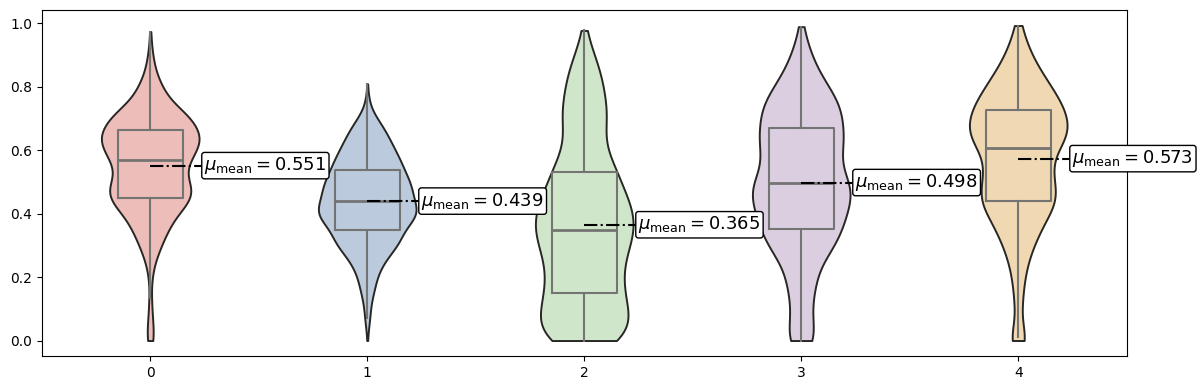

In [27]:
fig, ax = plt.subplots(figsize= (14, 4.5))
# fig, ax = plt.subplots(figsize= (35, 4.5))
# Some layout stuff ----------------------------------------------
# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)


# Add violins ----------------------------------------------------

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False,
)

# Customize violins (remove fill, customize line, etc.)
for pc, color in zip(violins['bodies'], COLOR_SCALE):
    pc.set_facecolor(color)
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed as dictionaries.
medianprops = dict(
    linewidth=2, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=1.5, 
    color=GREY_DARK,
)

ax.boxplot(
    y_data,
    widths=0.3,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
# for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
#     ax.scatter(x, y, s = 100, color=color, alpha=0.4)


# Add mean value labels ------------------------------------------
means = [y.mean() for y in y_data]
for i, mean in enumerate(means):
    # Add dot representing the mean
    # ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)
    
    # Add line conecting mean value and its label
    ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
    
    # Add mean value label.
    ax.text(
        i + 0.25,
        mean,
        r"${\mu}_{\rm{mean}} = $" + str(round(mean, 3)),
        fontsize=13,
        va="center",
        bbox = dict(
            facecolor="white",
            edgecolor="black",
            boxstyle="round",
            pad=0.15
        ),
        zorder=10 # to make sure the line is on top
    )

['TEST' 'RANDOM' 'PRETRAIN' 'FINETUNE' 'PREFIX_VT100']


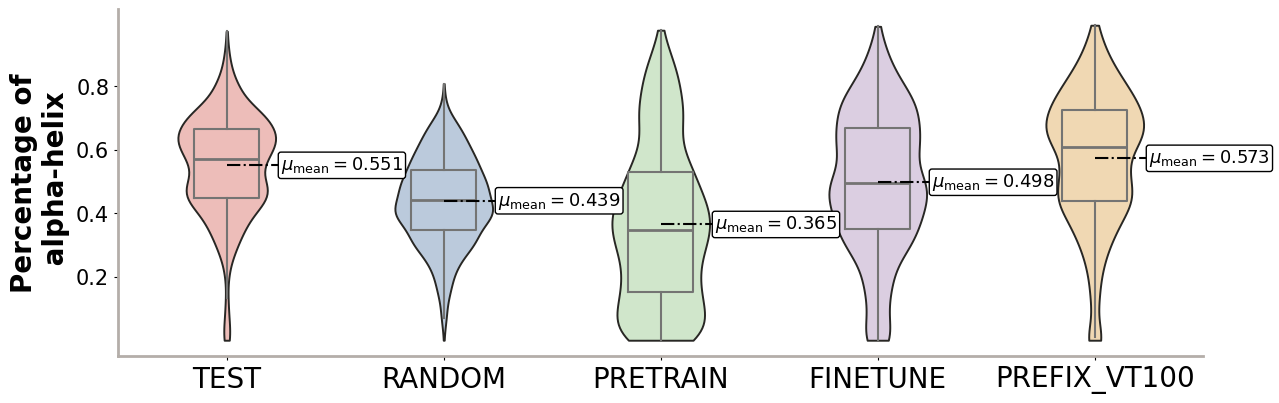

In [28]:
# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=3)
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=15)
ax.set_ylabel("Percentage of\n alpha-helix", size=20, weight="bold")

# xlabels accounts for the sample size for each species
# 修改X坐标值
# type_map = {'avg_prefix':'Avg_\nAlpha_AMP', 'concat_prefix_alpha_amp':'Concat_\nAlpha_AMP', 'concat_prefix_amp_alpha':'Concat_\nAMP_Alpha',
#  'prefix_alpha':'Alpha', 'prefix_amp':'AMP', 'prefix_init':'Init', 'concat_prefix_alpha_init':'Concat_\nAlpha_Init',
#  'concat_prefix_init_alpha':'Concat_\nInit_Alpha',}
for i in range(len(method_types)):
    if 'PREFIX' in method_types[i]:
        method_types[i] = 'VT_100'
    else:
        # name = method_types[i][0].upper() + method_types[i][1:]
        name = method_types[i].upper()
        method_types[i] = name
    # method_types[i] = type_map[method_types[i]]
print(method_types)
xlabels = [f"{method_type}" for i, method_type in enumerate(method_types)]
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=20, ha="center", ma="center")
# ax.set_xlabel("Prefix length", size=20, weight="bold")
fig